In [103]:
import numpy as np
import pandas as pd
import math

import os
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
dataset = pd.read_csv('../Jc/Downloads/master.csv')

In [168]:
dataset.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [169]:
##Impute null values with median
def impute_median(series):
    return series.fillna(series.median())

In [170]:
dataset['HDI for year'] = dataset['HDI for year'].transform(impute_median)

## Amount of countries with reporting data

In [171]:
unique_country = dataset['country'].unique()
print(unique_country)
print('-'*65)
print('There are {} countries in our dataset'.format(len(unique_country)))

['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia'
 'South 

## Amount of recorded suicides per country

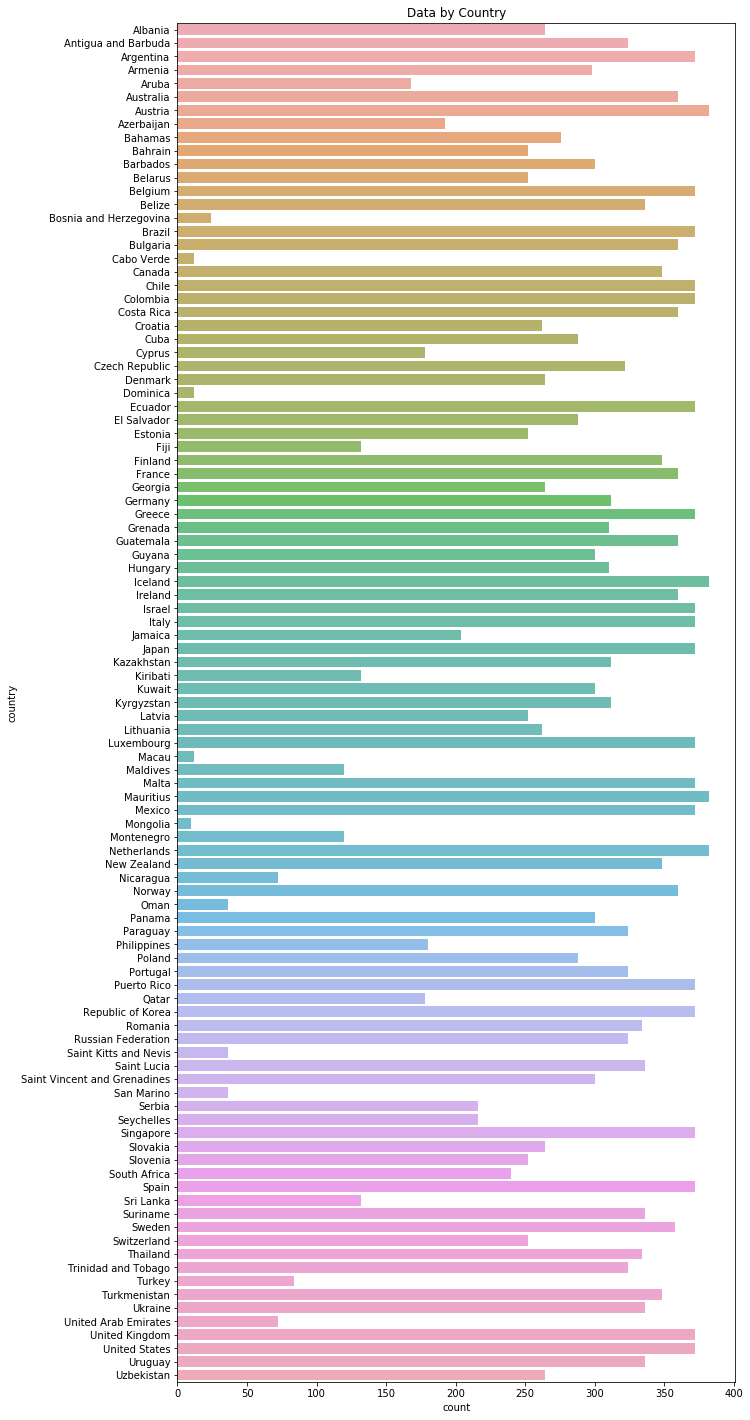

In [172]:
plt.figure(figsize=(10,25))
sns.countplot(y='country',data=dataset, alpha = 0.8)
plt.title('Data by Country')
plt.show()

## Correlation of our dataset

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.202184,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.063224,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.057240,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.037894,0.001785
HDI for year,0.202184,0.063224,0.057240,0.037894,1.000000,0.502250
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.502250,1.000000


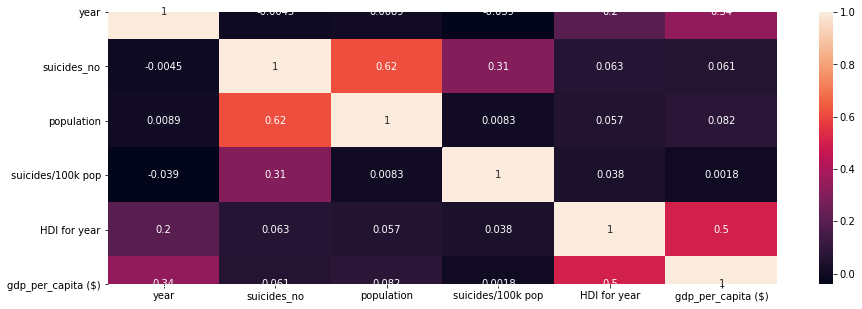

In [186]:
plt.figure(figsize=(15,5))
cor=sns.heatmap(dataset.corr(), annot=True)
dataset.corr()

## Which age group is most at risk for suicide?

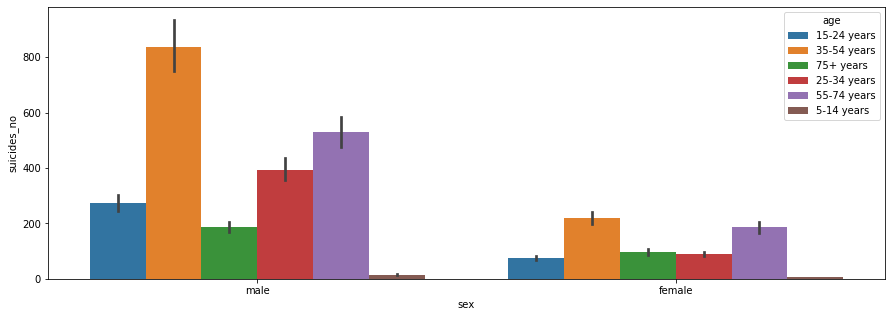

In [187]:
plt.figure(figsize=(15,5))
bar_gen = sns.barplot(x='sex', y='suicides_no', hue='age', data=dataset)

According to our visualized dataset, ages 35-54 have the most recorded suicides

## Which generation is most at risk for suicide?

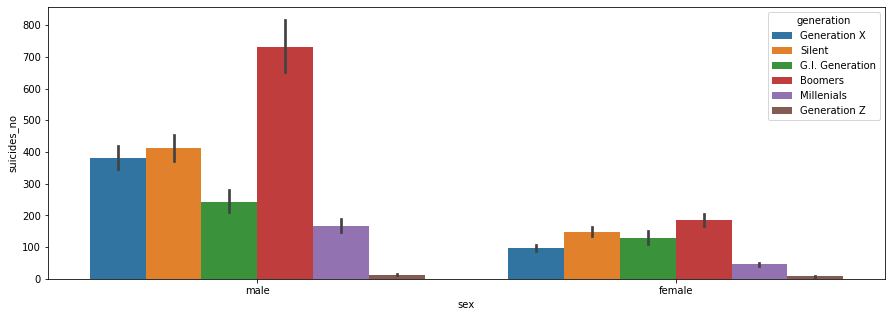

In [188]:
plt.figure(figsize=(15,5))
bar_gen = sns.barplot(x='sex', y='suicides_no', hue='generation', data=dataset)

According to the barplot once again, the 'Boomers' generation is the most recorded amount of suicides

Now, to further visualize our data, we can run a categorical plot to see which years had the most amount of suicide.

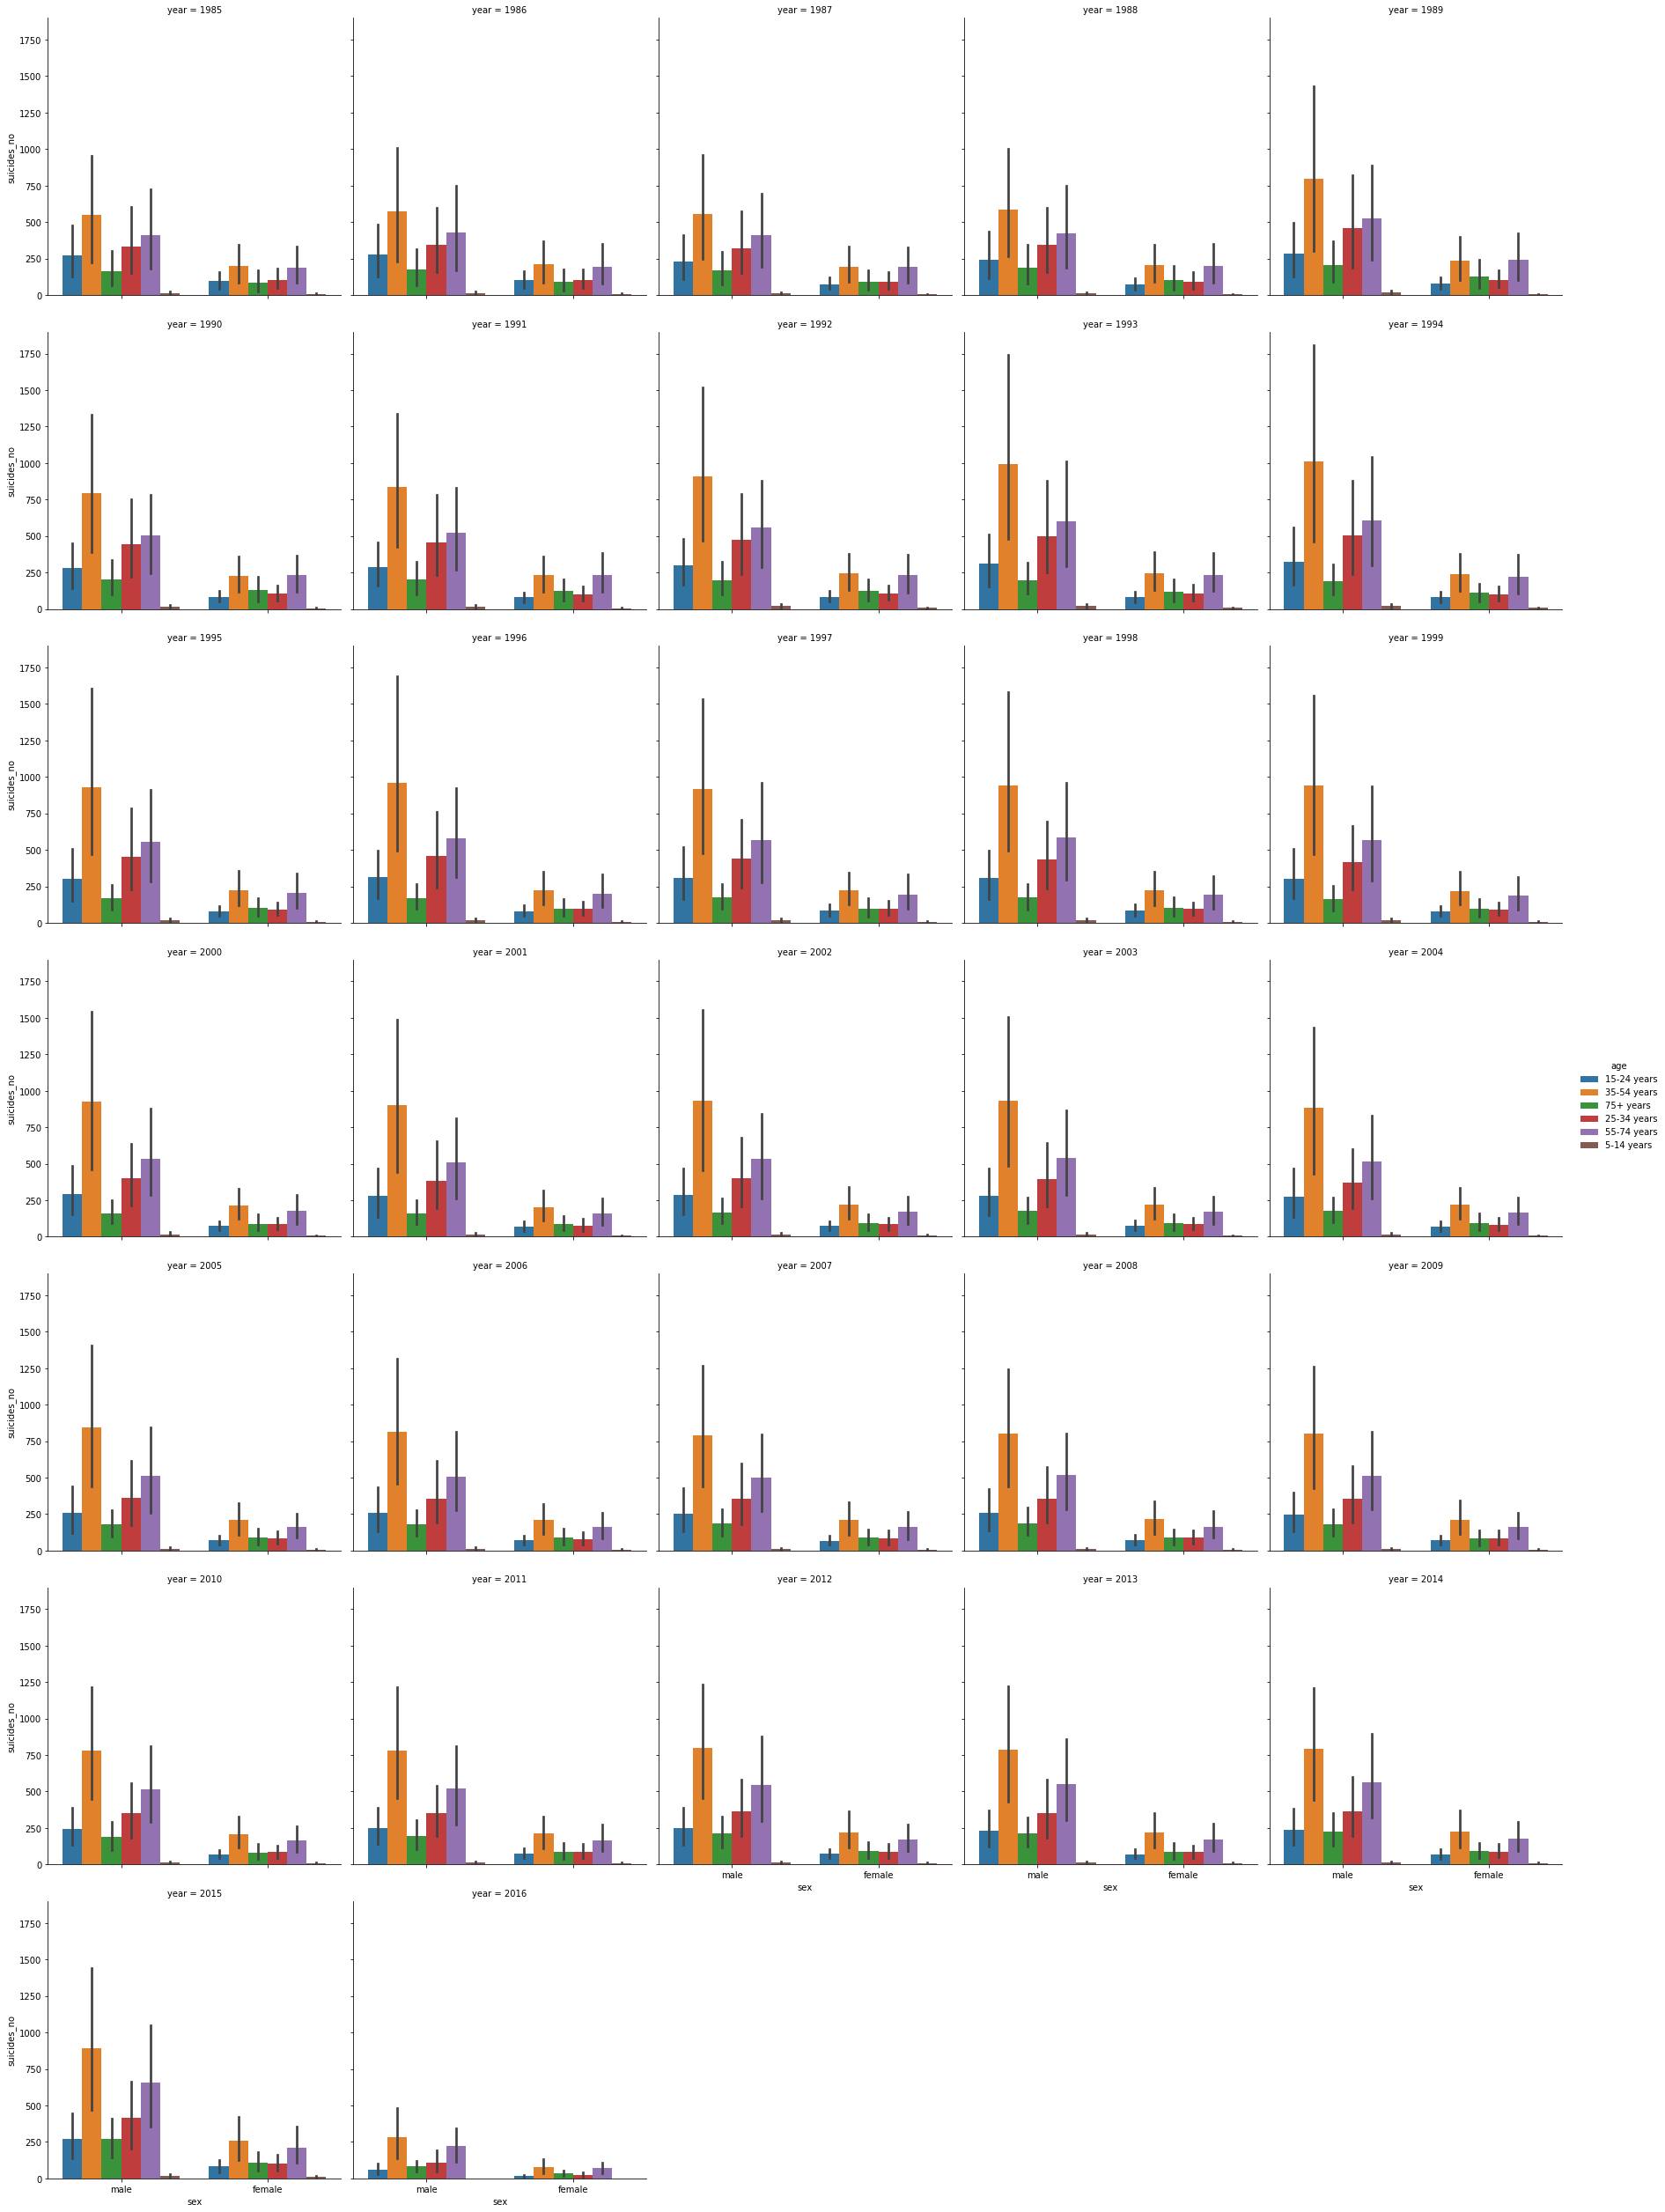

In [114]:
cat_accord_year = sns.catplot('sex','suicides_no',hue='age',col='year',data=dataset,kind='bar',col_wrap=5)

Now to get an even further idea of the data and how it looks, we can graph the data according to the occurrences in each age group into line plots.

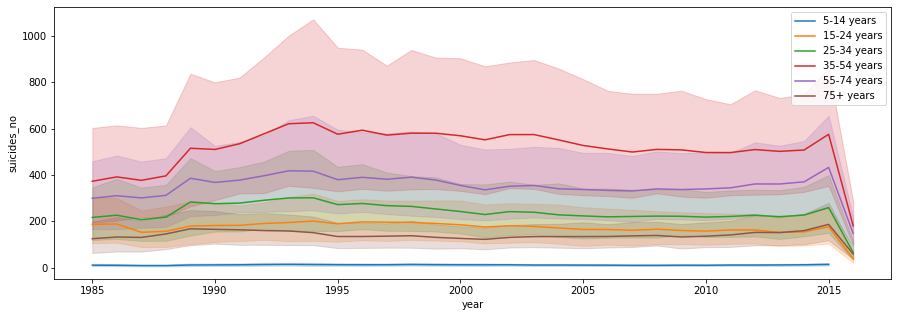

In [190]:
age_5 = dataset[dataset.age=='5-14 years']
age_15 = dataset[dataset.age=='15-24 years']
age_25 = dataset[dataset.age=='25-34 years']
age_35 = dataset[dataset.age=='35-54 years']
age_55 = dataset[dataset.age=='55-74 years']
age_75 = dataset[dataset.age=='75+ years']

plt.figure(figsize=(15,5))

age_5_lp = sns.lineplot(x='year', y='suicides_no', data=age_5)
age_15_lp = sns.lineplot(x='year', y='suicides_no', data=age_15)
age_25_lp = sns.lineplot(x='year', y='suicides_no', data=age_25)
age_35_lp = sns.lineplot(x='year', y='suicides_no', data=age_35)
age_55_lp = sns.lineplot(x='year', y='suicides_no', data=age_55)
age_75_lp = sns.lineplot(x='year', y='suicides_no', data=age_75)

leg = plt.legend(['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'])

There is a much more obvious variance increase the older our groups get.

And we can also do the same thing for the gender grouping.

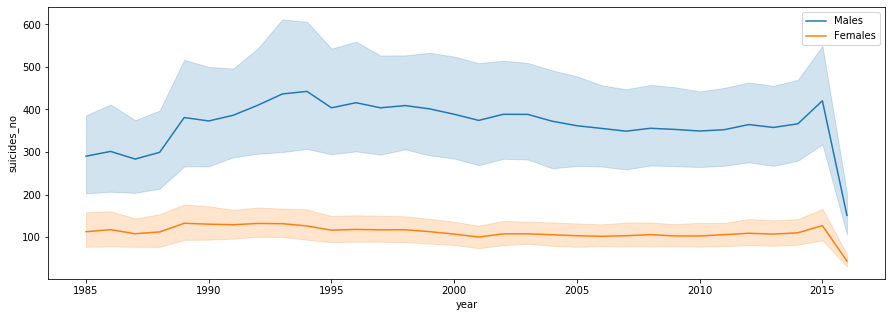

In [191]:
male_population = dataset[dataset.sex=='male']
female_population = dataset[dataset.sex=='female']

plt.figure(figsize=(15,5))

lp_male = sns.lineplot(x = 'year' , y = 'suicides_no' , data = male_population)
lp_female = sns.lineplot(x = 'year' , y = 'suicides_no' , data = female_population)
leg1 = plt.legend(['Males','Females'])

Males definitely have the much higher rate of suicide than females do on all fronts

In [192]:
dataset.columns
dataset['gdp_per_year'] = dataset[' gdp_for_year ($) '].str.replace(',','')

In [193]:
dataset.drop(' gdp_for_year ($) ', axis=1,inplace=True)

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),gdp_per_year
year,1.000000,-0.004546,0.008850,-0.039037,0.202184,0.339134,0.094529
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.063224,0.061330,0.430096
population,0.008850,0.616162,1.000000,0.008285,0.057240,0.081510,0.710697
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.037894,0.001785,0.025240
HDI for year,0.202184,0.063224,0.057240,0.037894,1.000000,0.502250,0.196978
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.502250,1.000000,0.303405
gdp_per_year,0.094529,0.430096,0.710697,0.025240,0.196978,0.303405,1.000000


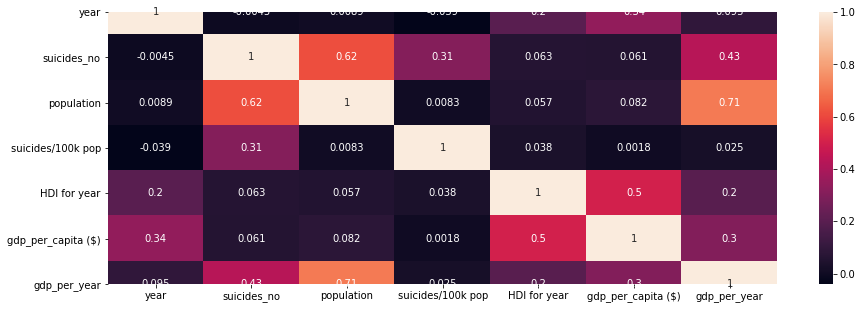

In [194]:
dataset['gdp_per_year'] = pd.to_numeric(dataset.gdp_per_year)
plt.figure(figsize=(15,5))
cor=sns.heatmap(dataset.corr(), annot=True)
dataset.corr()

# Modeling our predictions

Now that we have sufficiently visualized our data, we can now move on to modeling our predictions.

In [199]:
from sklearn.linear_model import LassoCV, LinearRegression, RidgeCV, ElasticNetCV, LogisticRegressionCV
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for x in ['country','sex','age','country-year','generation']:
    dataset[x] = le.fit_transform(dataset[x])

alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]
lasso_cv = LassoCV(alphas=alphas, cv=10)

In [205]:
from sklearn.model_selection import train_test_split, cross_val_score

Y = dataset['suicides_no']
X = dataset.loc[:, dataset.columns.isin(['population','suicides/100k pop','gdp_per_year_log','gdp_per_capita ($)'])]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=300)


In [207]:
lasso_cv = LassoCV(alphas=alphas, cv=5)

lasso_cv.fit(X_train, y_train)

y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)

print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the model in training set is: {}".format(lasso_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_cv.score(X_test, y_test)))

c:\users\jc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 119499837.61129284, tolerance: 1347060.722810523
  tol, rng, random, positive)
c:\users\jc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3127697726.0707626, tolerance: 1233133.0209507856
  tol, rng, random, positive)
c:\users\jc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3150281379.1820164, tolerance: 1233133.0209507856
  tol, rng, random, positive)
c:\users\jc\appdata\local\programs\python\python37-32\li

Best alpha value is: 1e-10
R-squared of the model in training set is: 0.47901967530018563
-----Test set statistics-----
R-squared of the model in test set is: 0.45238542183377606


c:\users\jc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4040641499.7770147, tolerance: 1551394.1644065229
  positive)


In [209]:
elasticnet_cv = ElasticNetCV(alphas=alphas, cv=5)

elasticnet_cv.fit(X_train, y_train)

y_preds_train = elasticnet_cv.predict(X_train)
y_preds_test = elasticnet_cv.predict(X_test)

print("Best alpha value is: {}".format(elasticnet_cv.alpha_))
print("R-squared of the model in training set is: {}".format(elasticnet_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(elasticnet_cv.score(X_test, y_test)))

Best alpha value is: 1.0
R-squared of the model in training set is: 0.47901947136542133
-----Test set statistics-----
R-squared of the model in test set is: 0.4523818322872175


c:\users\jc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2020788737.344037, tolerance: 1233133.0209507856
  tol, rng, random, positive)
c:\users\jc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3140234166.874628, tolerance: 1233133.0209507856
  tol, rng, random, positive)
c:\users\jc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3151538408.6495132, tolerance: 1233133.0209507856
  tol, rng, random, positive)
c:\users\jc\appdata\local\programs\python\python37-32\lib

Our Linear Regressors are not seeming explain the data well enough, seen by our R-squared value showing the that less than half our data is still unexplained or unaccounted for. Instead we can try a different kind of model. The few that would likely work in this situation might be a Support Vector Regressor or something along the lines of a Random Forest Regressor. First we can try the SVR.

In [210]:
from sklearn.svm import SVR
svr = SVR()
test = X.sample(frac=0.3,replace=True,random_state=1)
target = Y.sample(frac=0.3,replace=True,random_state=1)
svr.fit(test,target)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [211]:
svr.score(test,target)

0.06786557428524453

In [212]:
cross_val_score(svr,test,target,cv=5)

array([0.05106482, 0.05589277, 0.07436595, 0.04889816, 0.05969125])

Even just by looking at a few iterations of our SVR model, we can see that it is not even close to explaining the data we have available. Now we can try the Random Forest Regressor.

In [213]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, make_scorer

rfr = ensemble.RandomForestRegressor(random_state=333)

In [214]:
Y = dataset[['suicides_no']].values
X = dataset.drop('suicides_no',1).values

rfr.fit(X,Y)

c:\users\jc\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=333, verbose=0, warm_start=False)

In [215]:
cross_val_score(rfr,X,Y,cv=5)

c:\users\jc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\jc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\jc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\jc\appdata\local\programs\python\p

array([0.96699076, 0.98279055, 0.92770075, 0.66465407, 0.78022339])

In [216]:
print('Our average CV score for the Random Forest Regressor is: {}'.format(cross_val_score(rfr,X,Y,cv=5).mean()))

c:\users\jc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\jc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\jc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\jc\appdata\local\programs\python\p

Our average CV score for the Random Forest Regressor is: 0.8644719031981026


c:\users\jc\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


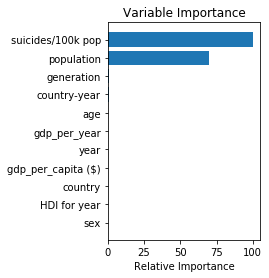

In [217]:
Y = dataset[['suicides_no']]
X = dataset.drop('suicides_no',1)

rfr.fit(X,Y)

feature_importance = rfr.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [218]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rfr.fit(X,Y), random_state=333).fit(X, Y)
eli5.show_weights(perm, feature_names = dataset.drop('suicides_no',axis=1).columns.tolist(),top=10)

c:\users\jc\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Weight,Feature
1.6054 ± 0.1243,population
1.1908 ± 0.0274,suicides/100k pop
0.0012 ± 0.0002,country-year
0.0011 ± 0.0006,generation
0.0005 ± 0.0000,gdp_per_year
0.0005 ± 0.0002,age
0.0003 ± 0.0001,year
0.0003 ± 0.0001,gdp_per_capita ($)
0.0002 ± 0.0000,country
0.0000 ± 0.0000,HDI for year


Now from our graph and table shown above, we see the only two important features that we have is the population and suicide rate. What this means it our data is generally almost entirely explained by how many people are present in a country. The higher the population, the higher the suicide rate. This could be attributed to many factors, but generally, the more people there are, the more people there are to commit suicide. Unfortunately no other features available to us in this dataset were factors in the rate of suicide.